In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

Using TensorFlow backend.


In [2]:
model = load_model('Gesture_Recognizing_Online.h5')

In [3]:
def predict(cur):
    fin_img = cv2.resize(cur, (28,28) )
    fin_img = cv2.flip(fin_img,1)
    plt.imshow(fin_img,cmap='gray')
    plt.show()
    fin_img = np.array(fin_img)
    fin_img = fin_img.reshape( (1,784) )
    fin_img = fin_img/255.0
    result = model.predict( fin_img )
    num = np.argmax( result[0] )
    return num, result[0][num]

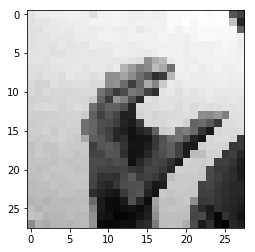

6
6


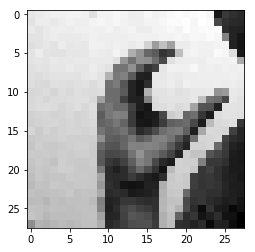

2
2


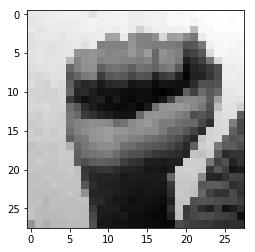

16
16


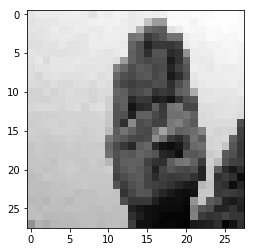

16
16


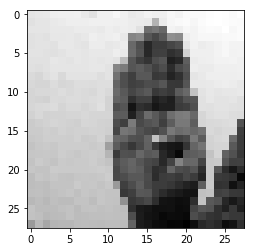

16
16


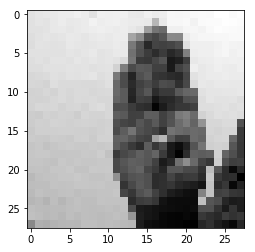

16
16


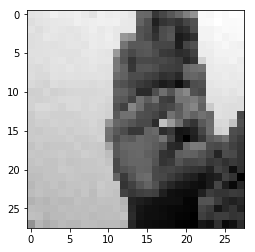

13
13


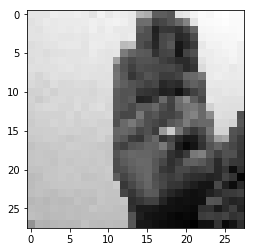

13
13


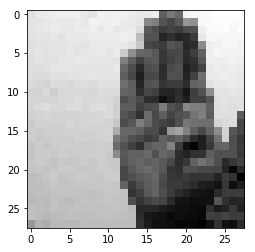

13
13


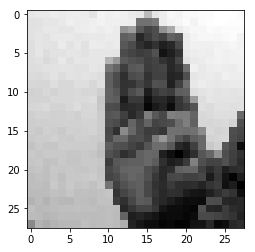

16
16


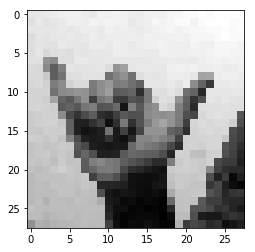

7
7


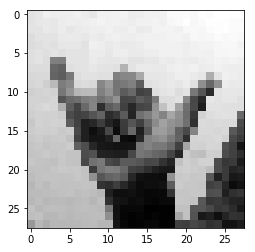

7
7


-1

In [5]:
cv2.namedWindow("frame", cv2.WINDOW_NORMAL)
cv2.namedWindow("hand", cv2.WINDOW_NORMAL)
cap = cv2.VideoCapture(0)
predicting = False
cur_text = ''
while(True):
    ret, frame = cap.read()
#     frame = cv2.flip(frame, 1)
    img = cv2.rectangle(frame,(800,100),(1200,500),(0,255,255),3)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img,'Align hand in this square',(800,80), font, 1,(0,0,0),2,cv2.LINE_AA)
    cv2.putText(frame,cur_text,(800,530), font, 1,(0,0,0),2,cv2.LINE_AA)
    cv2.imshow('frame',img)
    x = 800
    y = 100
    side = 400
    img_save = img[y:y+side, x:x+side]
    img_save = cv2.cvtColor(img_save, cv2.COLOR_BGR2GRAY)
#     blur = cv2.GaussianBlur(img_save,(5,5),0)
#     ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    cv2.imshow("hand", img_save)
    if predicting:
        num, _ = predict(img_save)
        print num
        if num!=0:
            alph = num
            cur_text = str(num)
            print cur_text
        predicting = False
    keypress = cv2.waitKey(1)
    
    if keypress == ord('q'):
        break
    if keypress == ord('s'):
        predicting = True
    if keypress == ord('c'):
        cur_text = ''
    
    
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)
